In [40]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,ElasticNetCV,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, tree, linear_model


In [2]:
kaggle_train = pd.read_csv('train.csv') 
kaggle_test = pd.read_csv('test.csv')
df = pd.concat([kaggle_train, kaggle_test], sort = False).reset_index()
testID = kaggle_test['Id']

In [3]:
noSalePrice = [x for x in df.columns if x!='SalePrice']
df[noSalePrice] = df[noSalePrice].fillna(df[noSalePrice].mean())

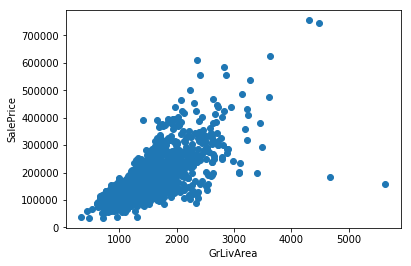

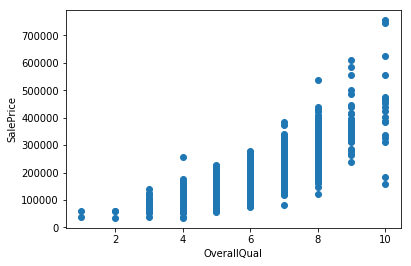

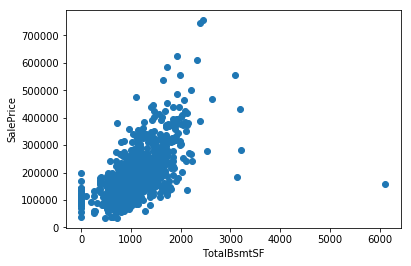

In [4]:
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()
plt.scatter(df['OverallQual'],df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')           
plt.show()
           
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')             
plt.show()

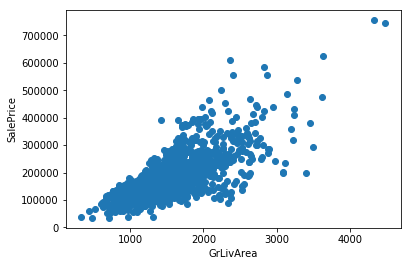

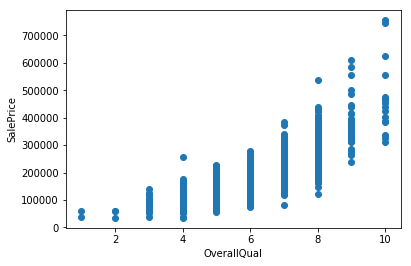

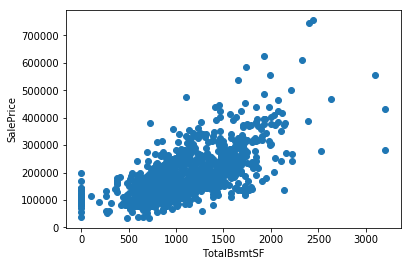

In [5]:
df = df[~df['Id'].isin([524, 1299])]

plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()
plt.scatter(df['OverallQual'],df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')           
plt.show()
           
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')             
plt.show()

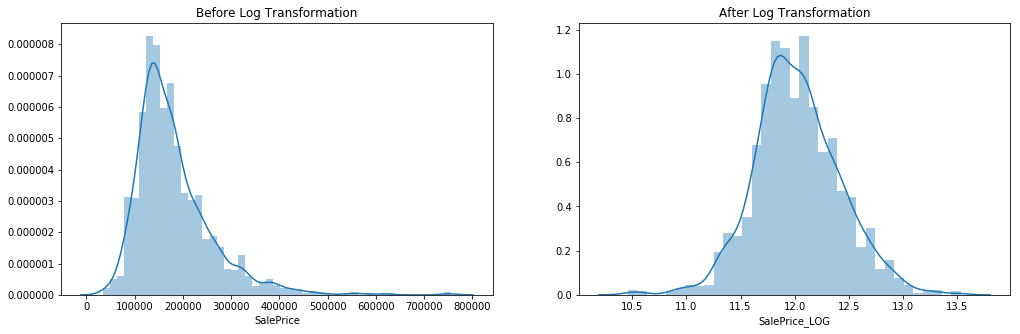

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(17,5))
sns.distplot(df[:1458]['SalePrice'], ax=ax[0]);
ax[0].set_title('Before Log Transformation');

#log transformation
df.loc[df.SalePrice.notnull(), 'SalePrice_LOG'] = np.log1p(df.loc[df.SalePrice.notnull(), 'SalePrice']) 

sns.distplot(df[:1458]['SalePrice_LOG'], ax=ax[1])
ax[1].set_title('After Log Transformation');

In [7]:
df['SalePrice'] = np.log1p(df['SalePrice'])
if('SalePrice_LOG' in df.columns): 
    df.drop('SalePrice_LOG', axis=1, inplace=True)
df['SalePrice']  

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
2914          NaN
2915          NaN
2916          NaN
2917          NaN
2918          NaN
Name: SalePrice, Length: 2917, dtype: float64

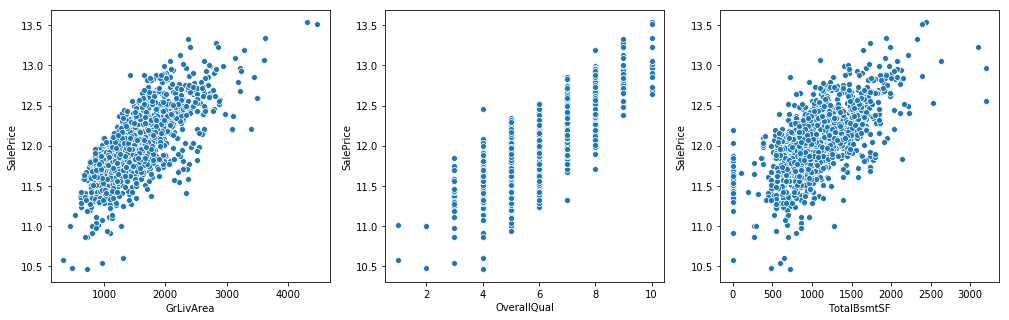

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))
sns.scatterplot('GrLivArea', 'SalePrice', data=df, ax=ax[0]);
sns.scatterplot('OverallQual', 'SalePrice', data=df, ax=ax[1]);
sns.scatterplot('TotalBsmtSF', 'SalePrice', data=df, ax=ax[2]);

In [9]:
dfc = df[['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF']].corr()
dfc[['SalePrice']][1:]

,SalePrice
GrLivArea,0.725211
OverallQual,0.821405
TotalBsmtSF,0.647563


In [10]:
X = df[:1458][['GrLivArea']] #independant variables
Y = df[:1458]['SalePrice'] #dependant variable
model =LinearRegression() #LinearRegression() = Least Square Algorithm
model.fit(X, Y); #fitting, or "training" the model

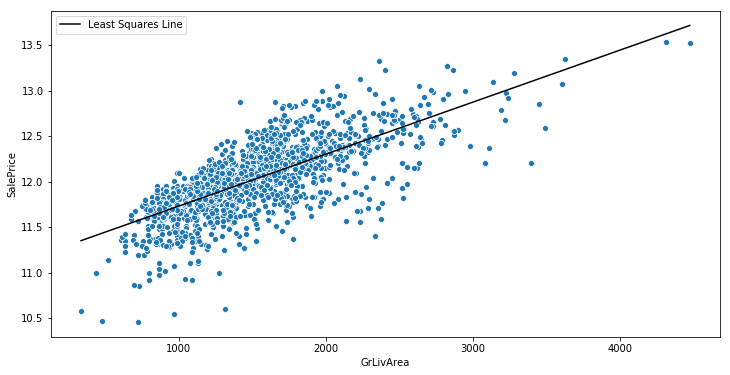

In [11]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
sns.scatterplot('GrLivArea', 'SalePrice', data=df); 

Ypredicted = model.predict(X)
sns.lineplot(X.iloc[:, 0].tolist(), Ypredicted, color='black', label='Least Squares Line'); 


In [20]:
ind_vars = ['GrLivArea', 'OverallQual', 'TotalBsmtSF']

In [22]:
Xtrain = df[:1458][ind_vars]
Xtest = df[1458:][ind_vars]
Ytrain = df[:1458]['SalePrice']

m = Xtrain.mean()
std = Xtrain.std()

Xtrain = (Xtrain - m) / std
Xtest = (Xtest - m) / std
Xtrain = pd.concat([df[:1458]['Id'],Xtrain],axis = 1)
Xtest = pd.concat([df[1458:]['Id'],Xtest],axis = 1)


In [23]:

model = LinearRegression()
model.fit(Xtrain, Ytrain);
nan_rows = df[df['TotalBsmtSF'].isnull()]
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df.at[2120, 'TotalBsmtSF'] = df['TotalBsmtSF'].mean()
nan_rows = df[df['TotalBsmtSF'].isnull()]
nan_rows

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [24]:
dff = pd.DataFrame({"The values our model predicted":np.expm1(Ypredicted)})

dff.astype(int).head()

,The values our model predicted
0,118451
1,171375
2,165875
3,164068
4,164711


In [46]:
ENSTest = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) 
#train_EN = EN.fit(Xtrain, Ytrain)
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber').fit(Xtrain,Ytrain)
GB_model = GBest.fit(Xtrain,Ytrain)
ENST_model = ENSTest.fit(Xtrain,Ytrain)

In [47]:
#Ypredicted = EN.predict(Xtest)
Final_labels = (np.exp(GB_model.predict(Xtest)) + np.exp(ENST_model.predict(Xtest))) / 2

In [48]:
#a = np.exp(Ypredicted)
submit = pd.DataFrame({'Id': Xtest.Id, 'SalePrice': Final_labels})
submit.to_csv('submission.csv', index=False)